# Swiggy Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
swiggy_data= pd.read_csv('Swiggy Bangalore Outlet Details.csv',sep=',',quotechar='"')

In [3]:
swiggy_data

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450
...,...,...,...,...,...
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,₹ 219
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,₹ 600
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,₹ 193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,₹ 200


In [4]:
swiggy_data.isnull().count()

Shop_Name       118
Cuisine         118
Location        118
Rating          118
Cost_for_Two    118
dtype: int64

In [5]:
swiggy_data.describe()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
count,118,118,118,118,118
unique,115,79,65,13,30
top,La Pino'z Pizza,North Indian,"BTM, BTM",4.1,₹ 300
freq,2,12,13,30,16


In [6]:
swiggy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Shop_Name     118 non-null    object
 1   Cuisine       118 non-null    object
 2   Location      118 non-null    object
 3   Rating        118 non-null    object
 4   Cost_for_Two  118 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [7]:
swiggy_data.columns

Index(['Shop_Name', 'Cuisine', 'Location', 'Rating', 'Cost_for_Two'], dtype='object')

In [8]:
swiggy_data['Rating']=swiggy_data['Rating'].str.replace(r'\--','0').astype(float)

C:\Users\nehac\AppData\Local\Temp\ipykernel_1420\6710242.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  swiggy_data['Rating']=swiggy_data['Rating'].str.replace(r'\--','0').astype(float)


In [9]:
swiggy_data['Rating'].tail(20)

98     0.0
99     4.1
100    4.1
101    3.8
102    3.9
103    3.6
104    3.7
105    4.0
106    4.0
107    4.0
108    4.3
109    4.0
110    4.0
111    4.4
112    3.9
113    3.9
114    4.1
115    4.2
116    4.3
117    4.2
Name: Rating, dtype: float64

In [10]:
swiggy_data.dtypes

Shop_Name        object
Cuisine          object
Location         object
Rating          float64
Cost_for_Two     object
dtype: object

In [11]:
rating_with_0= (swiggy_data['Rating']==0).sum()

In [12]:
rating_with_0

1

In [13]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('₹', '').replace(',', ''))
    return(x)

In [14]:
swiggy_data['Cost_for_Two'] = swiggy_data['Cost_for_Two'].apply(clean_currency).astype('float')

In [15]:
swiggy_data.dtypes

Shop_Name        object
Cuisine          object
Location         object
Rating          float64
Cost_for_Two    float64
dtype: object

In [16]:
swiggy_data.rename(columns={'Cost_for_Two':'Cost_for_Two (₹)'},inplace=True)

In [17]:
swiggy_data

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two (₹)
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150.0
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400.0
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126.0
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400.0
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450.0
...,...,...,...,...,...
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219.0
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,600.0
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193.0
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200.0


In [18]:
swiggy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Shop_Name         118 non-null    object 
 1   Cuisine           118 non-null    object 
 2   Location          118 non-null    object 
 3   Rating            118 non-null    float64
 4   Cost_for_Two (₹)  118 non-null    float64
dtypes: float64(2), object(3)
memory usage: 4.7+ KB


In [19]:
swiggy_data.describe()

,Rating,Cost_for_Two (₹)
count,118.000000,118.000000
mean,4.061864,321.008475
std,0.430845,137.286804
min,0.000000,100.000000
25%,4.000000,204.750000
50%,4.100000,300.000000
75%,4.300000,400.000000
max,4.800000,800.000000


In [20]:
rating_grouped= swiggy_data['Shop_Name'].groupby(swiggy_data['Rating']).count()

In [21]:
rating_grouped

Rating
0.0     1
3.6     2
3.7     6
3.8     4
3.9    13
4.0    21
4.1    30
4.2    10
4.3    23
4.4     4
4.5     1
4.6     2
4.8     1
Name: Shop_Name, dtype: int64

In [22]:
swiggy_data['Location'].unique()

array(['Koramangala, Koramangala', 'Sector 5, HSR',
       '6th Block, Koramangala', 'HSR, HSR', '5th Block, Koramangala',
       'Koramangala 4th  Block, Koramangala', 'BTM 2nd Stage, BTM',
       'BTM, BTM', '9th Main road, Koramangala', 'outer ring road, BTM',
       '7th Block, Koramangala', '1st MAin, Koramangala',
       'Bommanahalli, BTM', '6th block, Koramangala', 'Sector 4, HSR',
       'BTM 1st stage, BTM', 'Jakkasandra Extn, Koramangala',
       'Marutinagar Main Road, BTM', '1st Block, Koramangala',
       '4th Cross, BTM', 'koramangala, Koramangala', 'BTM 2nd stage, BTM',
       '3rd main, BTM', 'HSR 1st sector, HSR', 'Sector 7, HSR',
       '3rd Sector, HSR', 'Chocolate Factory Road, BTM',
       '16th Main Road, 2nd Stage, BTM', '1st Stage, BTM',
       'Hosur Main Road, Koramangala',
       '1st Cross Road, 5th Block, Near Jyothi Nivas College, Koramangala',
       'Mico Layout, BTM', '4th Cross, Koramangala',
       '4th Block, Koramangala', 'Intermediate Ring Road, K

In [23]:
swiggy_data['Location'].nunique()

65

In [24]:
swiggy_Koramangala=swiggy_data[swiggy_data['Location'].str.contains(r'Koramangala')]

In [25]:
swiggy_Koramangala

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two (₹)
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150.0
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126.0
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450.0
5,Kitchens of Punjab,North Indian,"Koramangala 4th Block, Koramangala",4.2,350.0
9,Yumlane Pizza,"Pizzas, Italian, Mexican","9th Main road, Koramangala",3.8,150.0
...,...,...,...,...,...
112,Kritunga,"Andhra, Biryani","5th Block, Koramangala",3.9,500.0
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219.0
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193.0
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200.0


In [26]:
swiggy_Hsr=swiggy_data[swiggy_data['Location'].str.contains(r'HSR')]

In [27]:
swiggy_Hsr

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two (₹)
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400.0
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400.0
8,Hotel Manu,"South Indian, Kerala, Chinese, North Indian","HSR, HSR",4.1,350.0
19,Shree Khana Khazana,"Indian, Rajasthani","Sector 4, HSR",4.1,350.0
24,New Udupi Grand,"Chinese, Jain, North Indian, South Indian","HSR, HSR",4.3,150.0
36,Biriyani Zone,"North Indian, Chinese, Biryani","HSR 1st sector, HSR",4.1,600.0
37,Gongura's,"North Indian, Chinese, Biryani","Sector 7, HSR",3.8,300.0
39,Leon Grill,"Turkish, Portuguese, American","3rd Sector, HSR",4.3,300.0
41,Cakewala,Desserts,"HSR, HSR",4.3,450.0
57,Donne Biriyani House,South Indian,"3rd sector, HSR",4.0,300.0


In [28]:
swiggy_Hsr.count()

Shop_Name           18
Cuisine             18
Location            18
Rating              18
Cost_for_Two (₹)    18
dtype: int64

In [29]:
swiggy_BTM= swiggy_data[swiggy_data['Location'].str.contains(r'BTM')]

In [30]:
swiggy_BTM.count()

Shop_Name           35
Cuisine             35
Location            35
Rating              35
Cost_for_Two (₹)    35
dtype: int64

As we can see the returants are given from only 3 locations


## Area wise analysis 

BTM Area 

<Axes: ylabel='Frequency'>

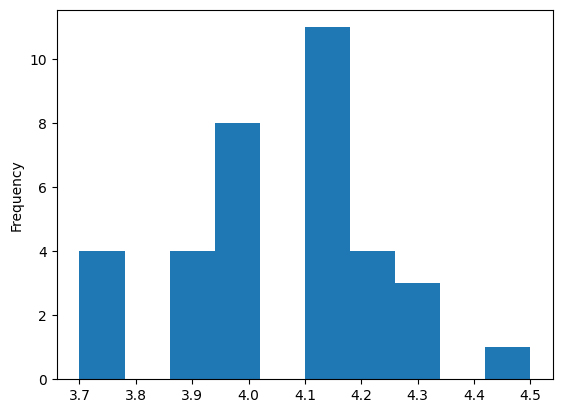

In [31]:
swiggy_BTM['Rating'].plot.hist(bins=10)


<Axes: ylabel='Frequency'>

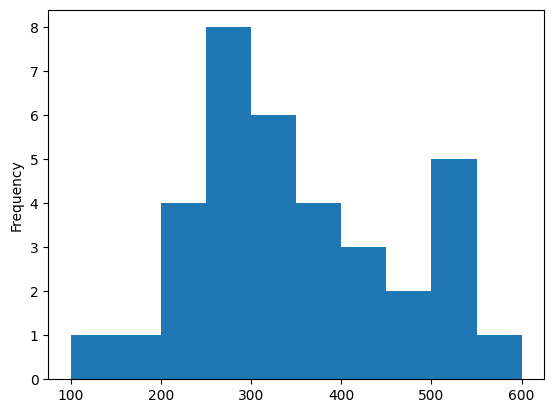

In [32]:
swiggy_BTM['Cost_for_Two (₹)'].plot.hist(bins=10)

HSR Area


<Axes: ylabel='Frequency'>

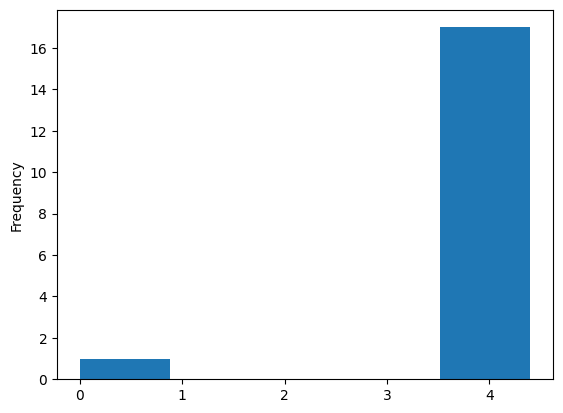

In [33]:
swiggy_Hsr['Rating'].plot.hist(bins=5)

<Axes: ylabel='Frequency'>

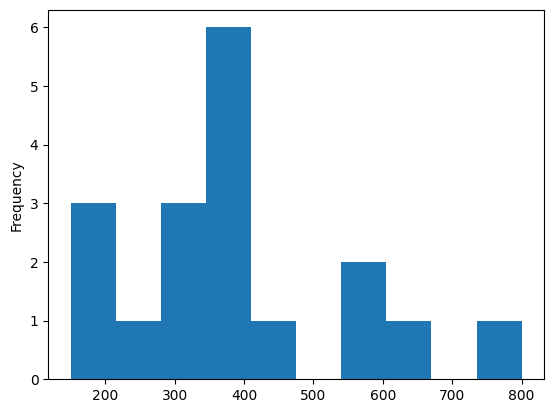

In [34]:
swiggy_Hsr['Cost_for_Two (₹)'].plot.hist(bins=10)

Koramangala Area

<Axes: ylabel='Frequency'>

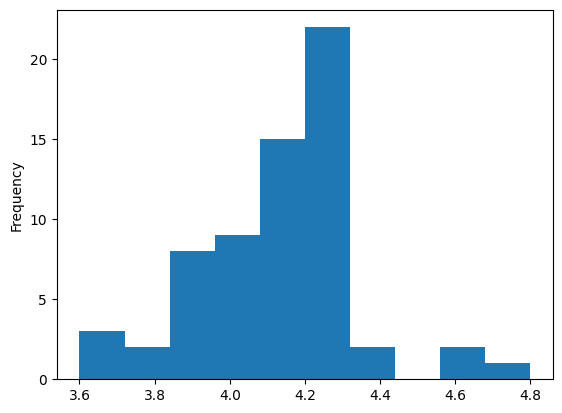

In [35]:
swiggy_Koramangala['Rating'].plot.hist(bins=10)

<Axes: ylabel='Frequency'>

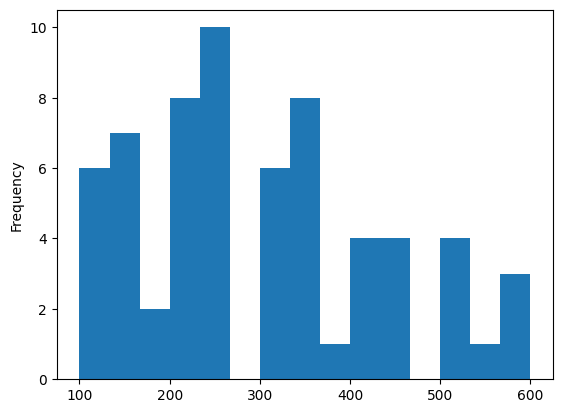

In [36]:
swiggy_Koramangala['Cost_for_Two (₹)'].plot.hist(bins=15)

As you can see Area wise the rating is different and so as cost.
1. BTM : Most has 4.1 to 4.2 rating cost between 200 to 300.
2. Hsr : Most has 4 or above rating cost between 300 to 400.
3. Koramangala : Most has 4.2 to 4.4 rating cost between 200 to 300.

With this we can conclude the most costly area is Hsr

# cusine Analysis 

In [37]:
from collections import Counter
freq= {}
for i in swiggy_data['Cuisine'].unique():
  #print(type(i))
  #print(i)
  a=i.split(',')
 # print(a)
  for p in a:
    free=p.lstrip(' ')
    if free in freq:
      freq[free]+=1
    else:
      freq[free]=1

print(freq)
  #new=Counter(a)
  #print(Counter(a))
  #d={a:a.count(x) for x in a}
    #print(x)
  #print(new)
print(len(freq))

{'Sweets': 2, 'North Indian': 32, 'Home Food': 2, 'Thalis': 1, 'Combo': 1, 'South Indian': 23, 'Fast Food': 16, 'Beverages': 9, 'Jain': 2, 'American': 8, 'Arabian': 4, 'Chinese': 35, 'Desserts': 15, 'Mughlai': 7, 'Thai': 2, 'Italian': 4, 'Kerala': 6, 'Pizzas': 5, 'Mexican': 3, 'Andhra': 12, 'Seafood': 8, 'Biryani': 18, 'Indian': 5, 'Rajasthani': 1, 'Bakery': 2, 'Healthy Food': 4, 'Hyderabadi': 5, 'Snacks': 4, 'Turkish': 2, 'Portuguese': 2, 'Chaat': 2, 'Asian': 3, 'Continental': 3, 'Mediterranean': 1, 'Lebanese': 1, 'Cafe': 2, 'Salads': 2, 'Pastas': 1, 'Punjabi': 2, 'Juices': 2, 'Kebabs': 2, 'Grill': 2, 'Ice Cream': 2, 'Tandoor': 1, 'Chettinad': 2, 'Pan-Asian': 2, 'Oriental': 1, 'Middle Eastern': 1}
48


Here you can see the different types of cusine present and the number of shops sell them

In [38]:
swiggy_data['Cuisine'].nunique()

79

In [39]:
list_of_cusine=swiggy_data.Cuisine.unique()

In [40]:
swiggy_data.Cuisine.nunique()

79

In [41]:
swiggy_data.groupby(swiggy_data['Cuisine']).sum()

,Rating,Cost_for_Two (₹)
Cuisine,,
American,4.3,450.0
"American, Arabian, Chinese, Desserts, Fast Food, Mughlai, North Indian",4.4,400.0
"American, Fast Food",12.5,1050.0
"Andhra, Biryani",12.1,1300.0
"Andhra, Biryani, Chinese, Desserts, Fast Food, Seafood, South Indian",8.3,450.0
...,...,...
"South Indian, North Indian, Fast Food, Beverages, Jain",4.1,126.0
"South Indian, Snacks, North Indian, Chinese",4.1,250.0
Sweets,4.3,150.0


Here you can see total number of shops in dataset are 115 out of 118

In [42]:
swiggy_data['Shop_Name'].nunique()

115

In [43]:
swiggy_data[swiggy_data.duplicated(['Shop_Name'], keep=False)]

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two (₹)
7,La Pino'z Pizza,Italian,"BTM, BTM",3.9,500.0
30,Easy Bites,"Snacks, American","koramangala, Koramangala",3.9,200.0
39,Leon Grill,"Turkish, Portuguese, American","3rd Sector, HSR",4.3,300.0
77,Leon Grill,"Turkish, Portuguese, American, Grill","5th Block, Koramangala",4.3,300.0
97,La Pino'z Pizza,Italian,"4th Block, Koramangala",3.9,251.0
101,Easy Bites,"Snacks, American","9th Main Rd, Sector 6, HSR Layout, HSR",3.8,200.0


Here you can see 3 same shops are present in different area and La Pino'z Pizza price is also changed according to location.

In [44]:
list_of_cusine.dtype

dtype('O')

Bar greaph for the number of cusine items

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30'),
  Text(0, 35.0, '35'),
  Text(0, 40.0, '40')])

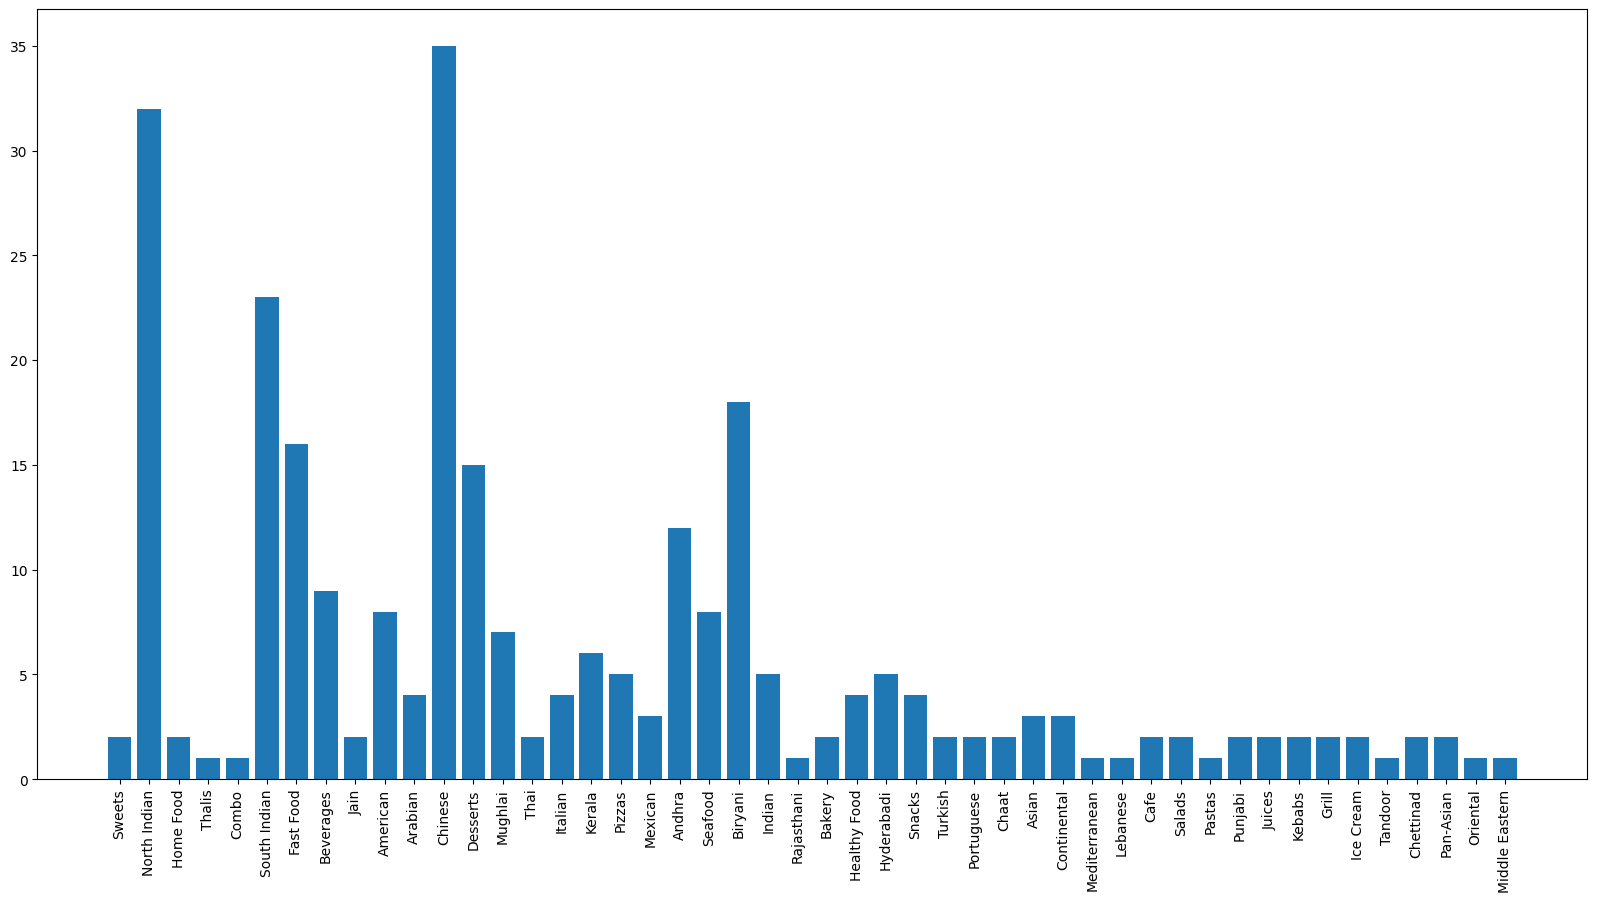

In [45]:
keys = freq.keys()
values = freq.values()
plt.figure(figsize=(20,10))
plt.bar(keys,values)
plt.xticks(rotation='vertical')
plt.yticks()

In [46]:
print(freq)

{'Sweets': 2, 'North Indian': 32, 'Home Food': 2, 'Thalis': 1, 'Combo': 1, 'South Indian': 23, 'Fast Food': 16, 'Beverages': 9, 'Jain': 2, 'American': 8, 'Arabian': 4, 'Chinese': 35, 'Desserts': 15, 'Mughlai': 7, 'Thai': 2, 'Italian': 4, 'Kerala': 6, 'Pizzas': 5, 'Mexican': 3, 'Andhra': 12, 'Seafood': 8, 'Biryani': 18, 'Indian': 5, 'Rajasthani': 1, 'Bakery': 2, 'Healthy Food': 4, 'Hyderabadi': 5, 'Snacks': 4, 'Turkish': 2, 'Portuguese': 2, 'Chaat': 2, 'Asian': 3, 'Continental': 3, 'Mediterranean': 1, 'Lebanese': 1, 'Cafe': 2, 'Salads': 2, 'Pastas': 1, 'Punjabi': 2, 'Juices': 2, 'Kebabs': 2, 'Grill': 2, 'Ice Cream': 2, 'Tandoor': 1, 'Chettinad': 2, 'Pan-Asian': 2, 'Oriental': 1, 'Middle Eastern': 1}


In [47]:

Keymax = max(zip(freq.values(), freq.keys()))[1]
print(Keymax, "=>", freq[Keymax])


Chinese => 35


here you can watch most of the resturant sell chinease so we may infer that people may be fond of chinese.

#Area wise analysis

**BTM Area**


In [48]:
from collections import Counter
freq_btm= {}
for i in swiggy_BTM['Cuisine'].unique():
  #print(type(i))
  #print(i)
  a=i.split(',')
  for p in a:
    striped=p.lstrip(' ')
    if striped in freq_btm:
      freq_btm[striped]+=1
    else:
      freq_btm[striped]=1


(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5'),
  Text(0, 20.0, '20.0')])

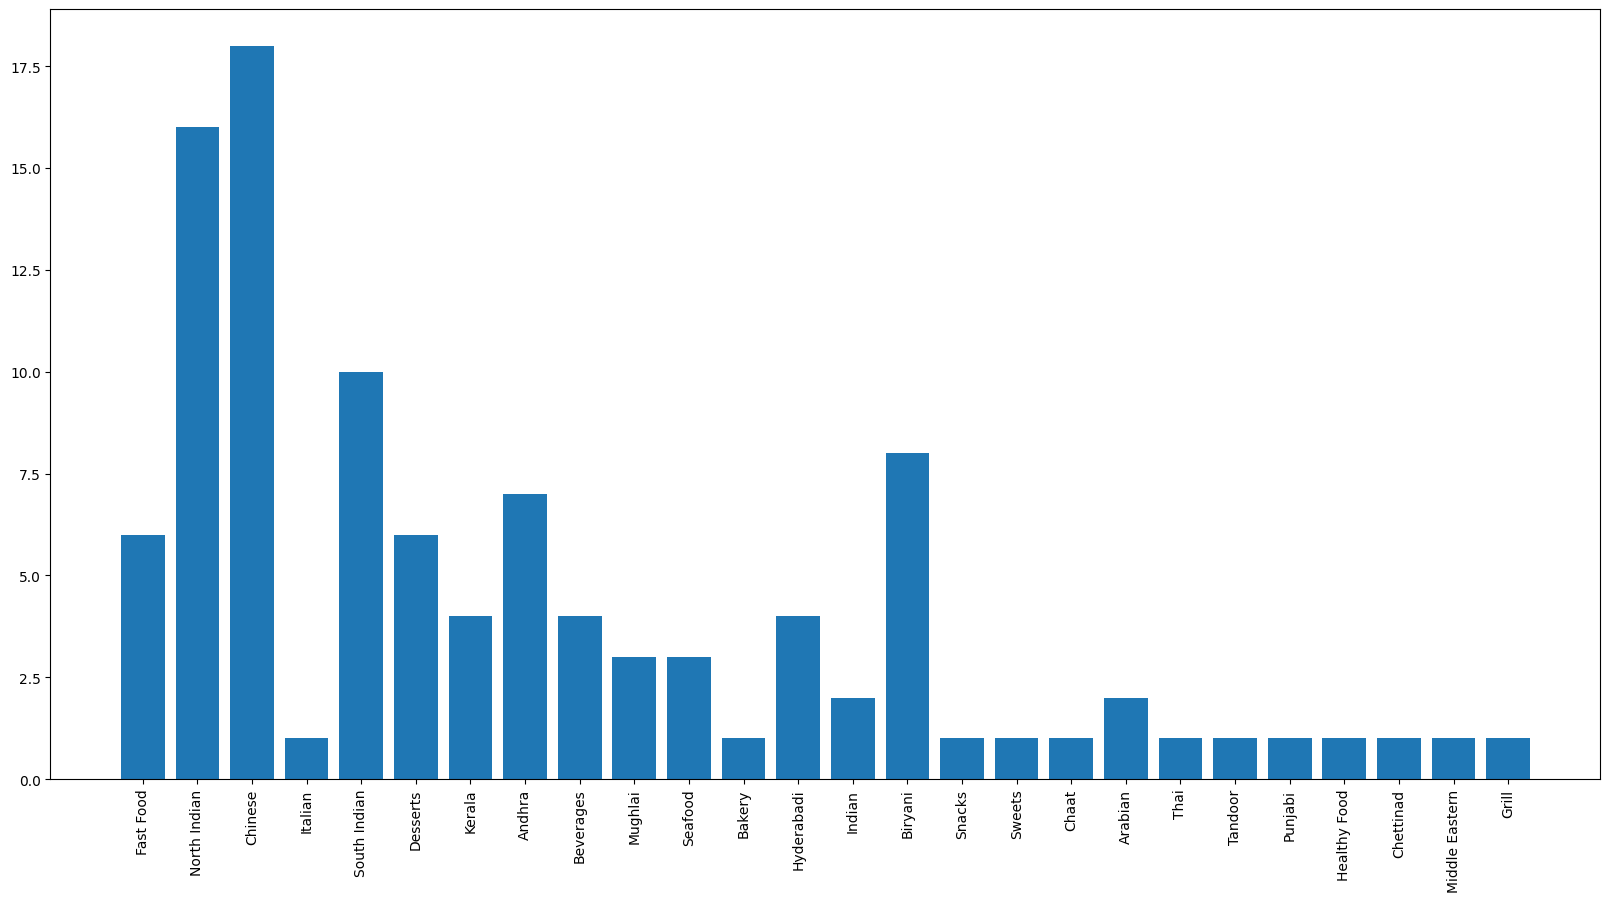

In [49]:
keys = freq_btm.keys()
values = freq_btm.values()
plt.figure(figsize=(20,10))
plt.bar(keys,values)
plt.xticks(rotation='vertical')
plt.yticks()

In [50]:
print(freq_btm)

{'Fast Food': 6, 'North Indian': 16, 'Chinese': 18, 'Italian': 1, 'South Indian': 10, 'Desserts': 6, 'Kerala': 4, 'Andhra': 7, 'Beverages': 4, 'Mughlai': 3, 'Seafood': 3, 'Bakery': 1, 'Hyderabadi': 4, 'Indian': 2, 'Biryani': 8, 'Snacks': 1, 'Sweets': 1, 'Chaat': 1, 'Arabian': 2, 'Thai': 1, 'Tandoor': 1, 'Punjabi': 1, 'Healthy Food': 1, 'Chettinad': 1, 'Middle Eastern': 1, 'Grill': 1}


In [51]:
Keymax = max(zip(freq_btm.values(), freq_btm.keys()))[1]
print(Keymax, "=>", freq_btm[Keymax])
Keymax = min(zip(freq_btm.values(), freq_btm.keys()))[1]
print(Keymax, "=>", freq_btm[Keymax])

Chinese => 18
Bakery => 1


In this area more resturant sell chinese cusine

**HSR Area**

In [52]:
from collections import Counter
freq_hsr= {}
for i in swiggy_Hsr['Cuisine'].unique():
  #print(type(i))
  #print(i)
  a=i.split(',')
  for p in a:
    striped=p.lstrip(' ')
    if striped in freq_hsr:
      freq_hsr[striped]+=1
    else:
      freq_hsr[striped]=1


In [53]:
freq_hsr

{'North Indian': 6,
 'Home Food': 1,
 'Thalis': 1,
 'Combo': 1,
 'American': 3,
 'Arabian': 1,
 'Chinese': 4,
 'Desserts': 3,
 'Fast Food': 1,
 'Mughlai': 1,
 'South Indian': 4,
 'Kerala': 1,
 'Indian': 1,
 'Rajasthani': 1,
 'Jain': 1,
 'Biryani': 4,
 'Turkish': 1,
 'Portuguese': 1,
 'Andhra': 1,
 'Bakery': 1,
 'Juices': 1,
 'Kebabs': 1,
 'Snacks': 1,
 'Chettinad': 1}

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7')])

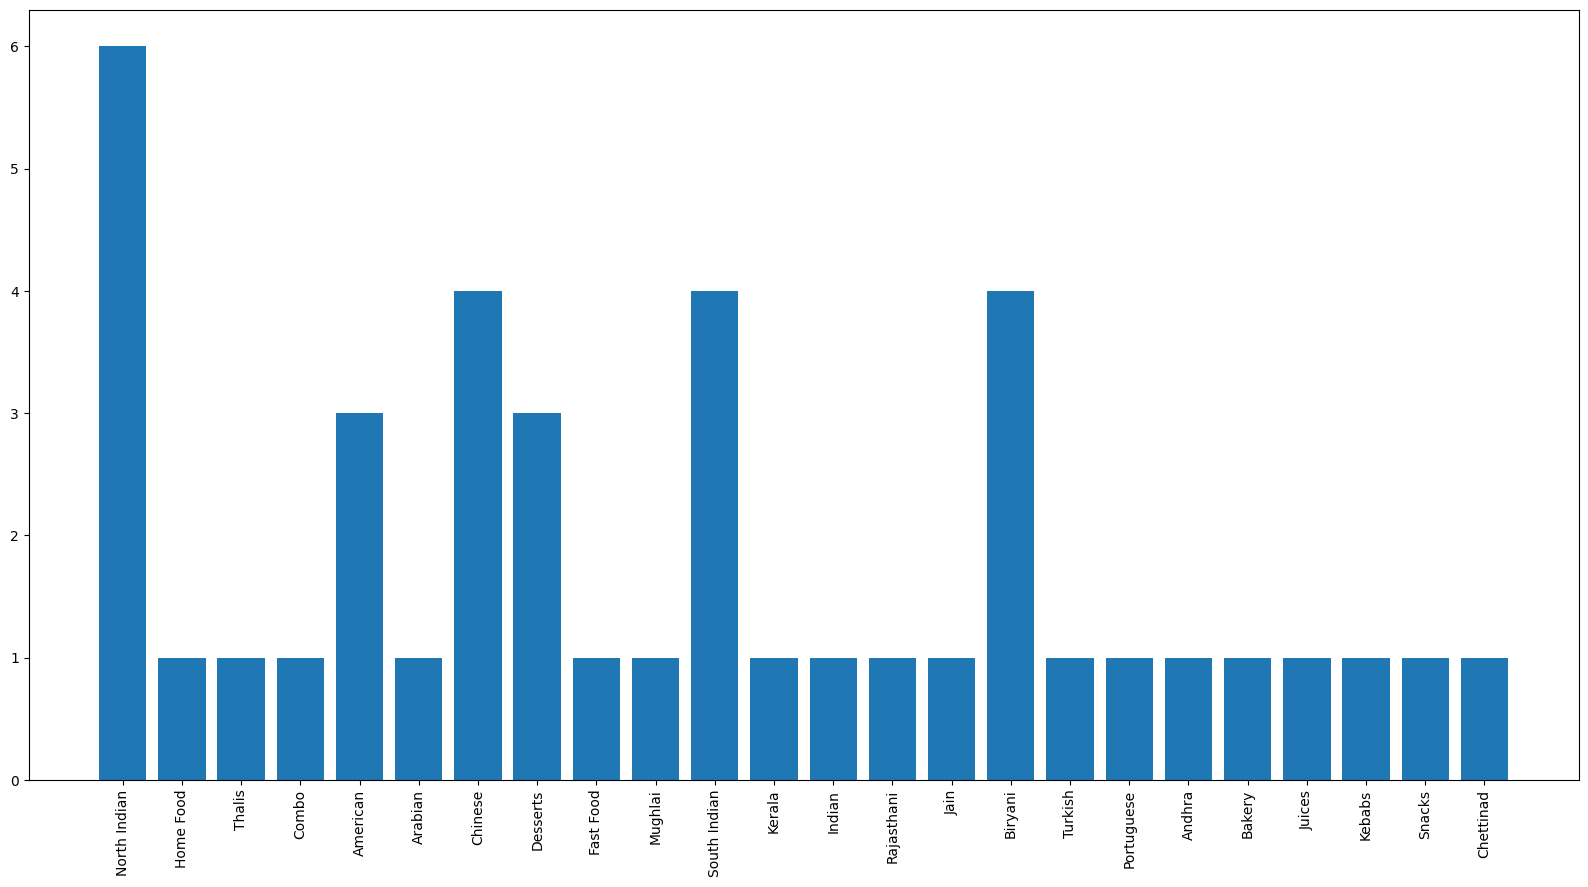

In [54]:
keys = freq_hsr.keys()
values = freq_hsr.values()
plt.figure(figsize=(20,10))
plt.bar(keys,values)
plt.xticks(rotation='vertical')
plt.yticks()

In [55]:
Keymax = max(zip(freq_hsr.values(), freq_hsr.keys()))[1]
print(Keymax, "=>", freq_hsr[Keymax])
Keymax = min(zip(freq_hsr.values(), freq_hsr.keys()))[1]
print(Keymax, "=>", freq_hsr[Keymax])

North Indian => 6
Andhra => 1


In this area more resturant sell North indian cusine

**Koramangala Area**

In [56]:
from collections import Counter
freq_Koramangala= {}
for i in swiggy_Koramangala['Cuisine'].unique():
  #print(type(i))
  #print(i)
  a=i.split(',')
  for p in a:
    striped=p.lstrip(' ')
    if striped in freq_Koramangala :
      freq_Koramangala[striped]+=1
    else:
      freq_Koramangala[striped]=1

In [57]:
freq_Koramangala

{'Sweets': 1,
 'South Indian': 11,
 'North Indian': 14,
 'Fast Food': 9,
 'Beverages': 5,
 'Jain': 1,
 'Chinese': 15,
 'Thai': 2,
 'Pizzas': 5,
 'Italian': 4,
 'Mexican': 3,
 'Desserts': 8,
 'Andhra': 5,
 'Biryani': 10,
 'Seafood': 5,
 'Arabian': 1,
 'Healthy Food': 3,
 'American': 6,
 'Snacks': 3,
 'Mughlai': 3,
 'Asian': 3,
 'Continental': 3,
 'Mediterranean': 1,
 'Lebanese': 1,
 'Bakery': 1,
 'Cafe': 2,
 'Salads': 2,
 'Pastas': 1,
 'Punjabi': 1,
 'Hyderabadi': 1,
 'Kerala': 1,
 'Turkish': 1,
 'Portuguese': 1,
 'Grill': 1,
 'Home Food': 1,
 'Indian': 2,
 'Ice Cream': 2,
 'Juices': 1,
 'Chaat': 1,
 'Kebabs': 1,
 'Pan-Asian': 2,
 'Oriental': 1}

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14'),
  Text(0, 16.0, '16')])

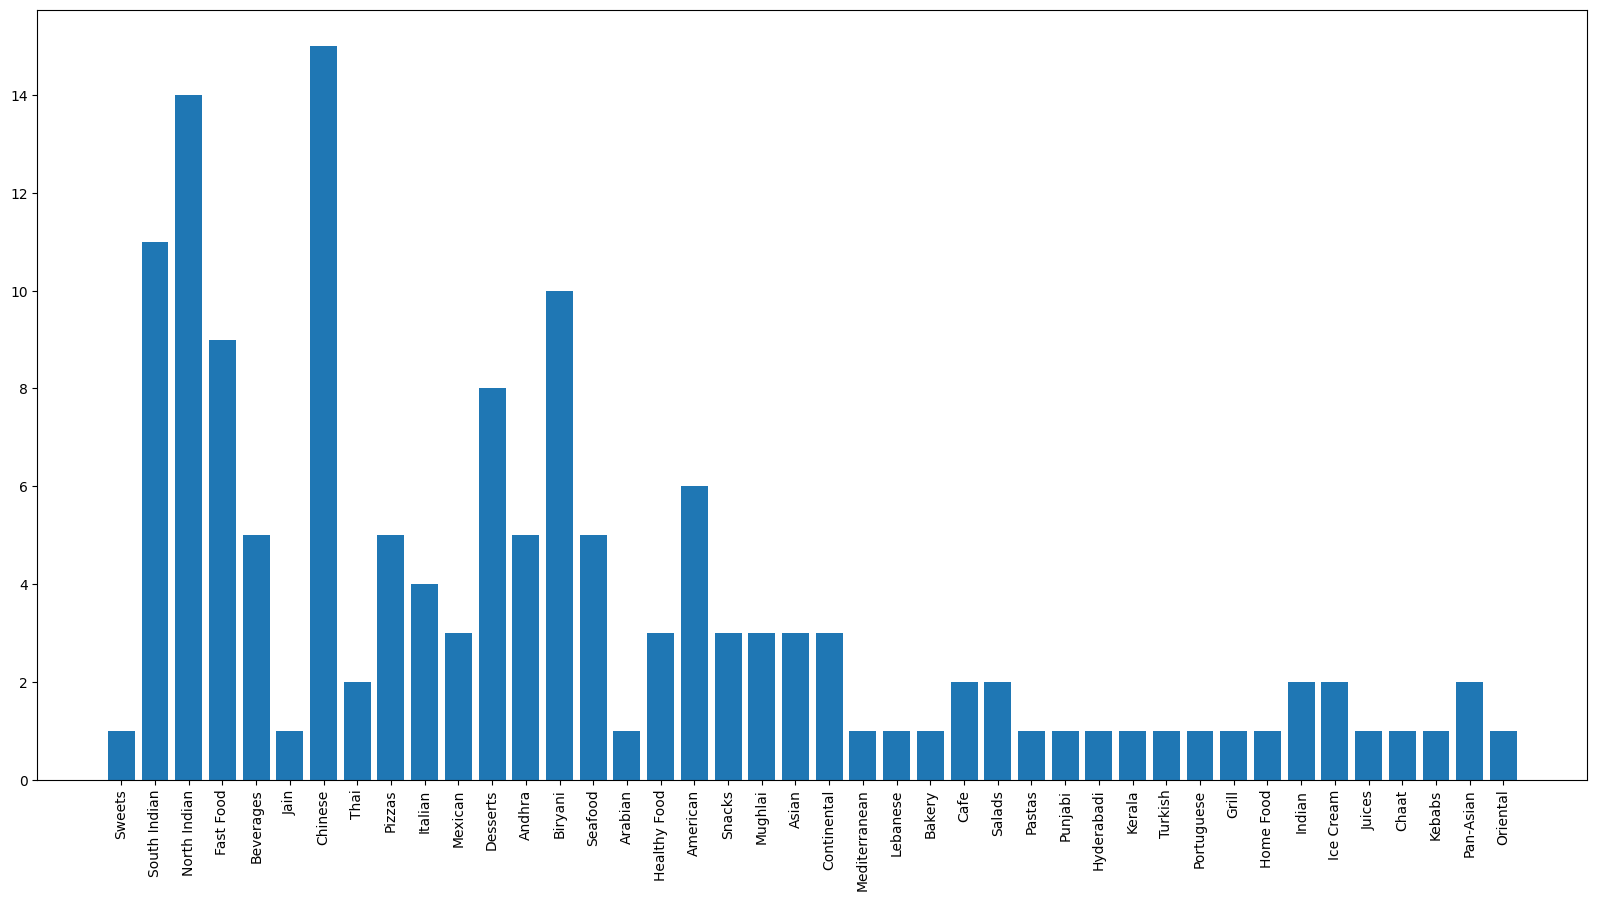

In [58]:
keys = freq_Koramangala.keys()
values = freq_Koramangala.values()
plt.figure(figsize=(20,10))
plt.bar(keys,values)
plt.xticks(rotation='vertical')
plt.yticks()

In [59]:
Keymax = max(zip(freq_Koramangala.values(), freq_Koramangala.keys()))[1]
print(Keymax, "=>", freq_Koramangala[Keymax])
Keymax = min(zip(freq_Koramangala.values(), freq_Koramangala.keys()))[1]
print(Keymax, "=>", freq_Koramangala[Keymax])

Chinese => 15
Arabian => 1


In this area more resturant sell chinese cusine